In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('Mall_Customers.csv')

In [45]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
# Select features for clustering (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print("Shape of X:", X.shape)
print("Features selected:", X.columns.tolist())

Shape of X: (200, 2)
Features selected: ['Annual Income (k$)', 'Spending Score (1-100)']


In [48]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [49]:
# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df_kmeans = df.copy()
df_kmeans['KMeans_Cluster'] = kmeans_labels

print("K-means Clustering Results:")
print("Number of clusters:", len(np.unique(kmeans_labels)))
print("Cluster distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

K-means Clustering Results:
Number of clusters: 5
Cluster distribution:
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


d:\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the dataframe
df_dbscan = df.copy()
df_dbscan['DBSCAN_Cluster'] = dbscan_labels

print("DBSCAN Clustering Results:")
print("Number of clusters:", len(np.unique(dbscan_labels[dbscan_labels != -1])))
print("Number of noise points:", np.sum(dbscan_labels == -1))
print("Cluster distribution:")
print(pd.Series(dbscan_labels).value_counts().sort_index())

DBSCAN Clustering Results:
Number of clusters: 2
Number of noise points: 8
Cluster distribution:
-1      8
 0    157
 1     35
Name: count, dtype: int64


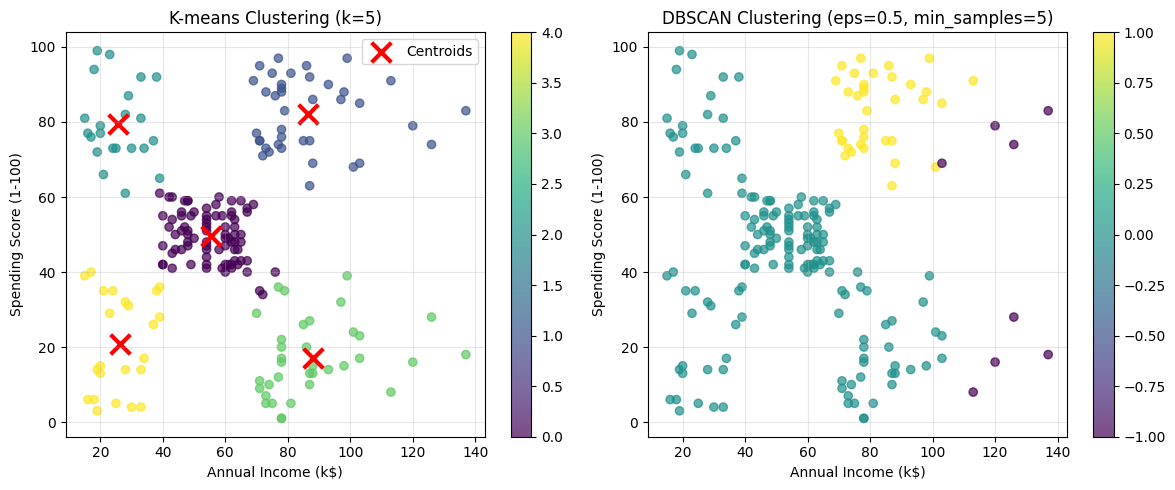

In [51]:
# Visualize K-means clustering results
plt.figure(figsize=(12, 5))

# K-means plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
           scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-means Clustering (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.legend()
plt.grid(True, alpha=0.3)

# DBSCAN plot
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (eps=0.5, min_samples=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

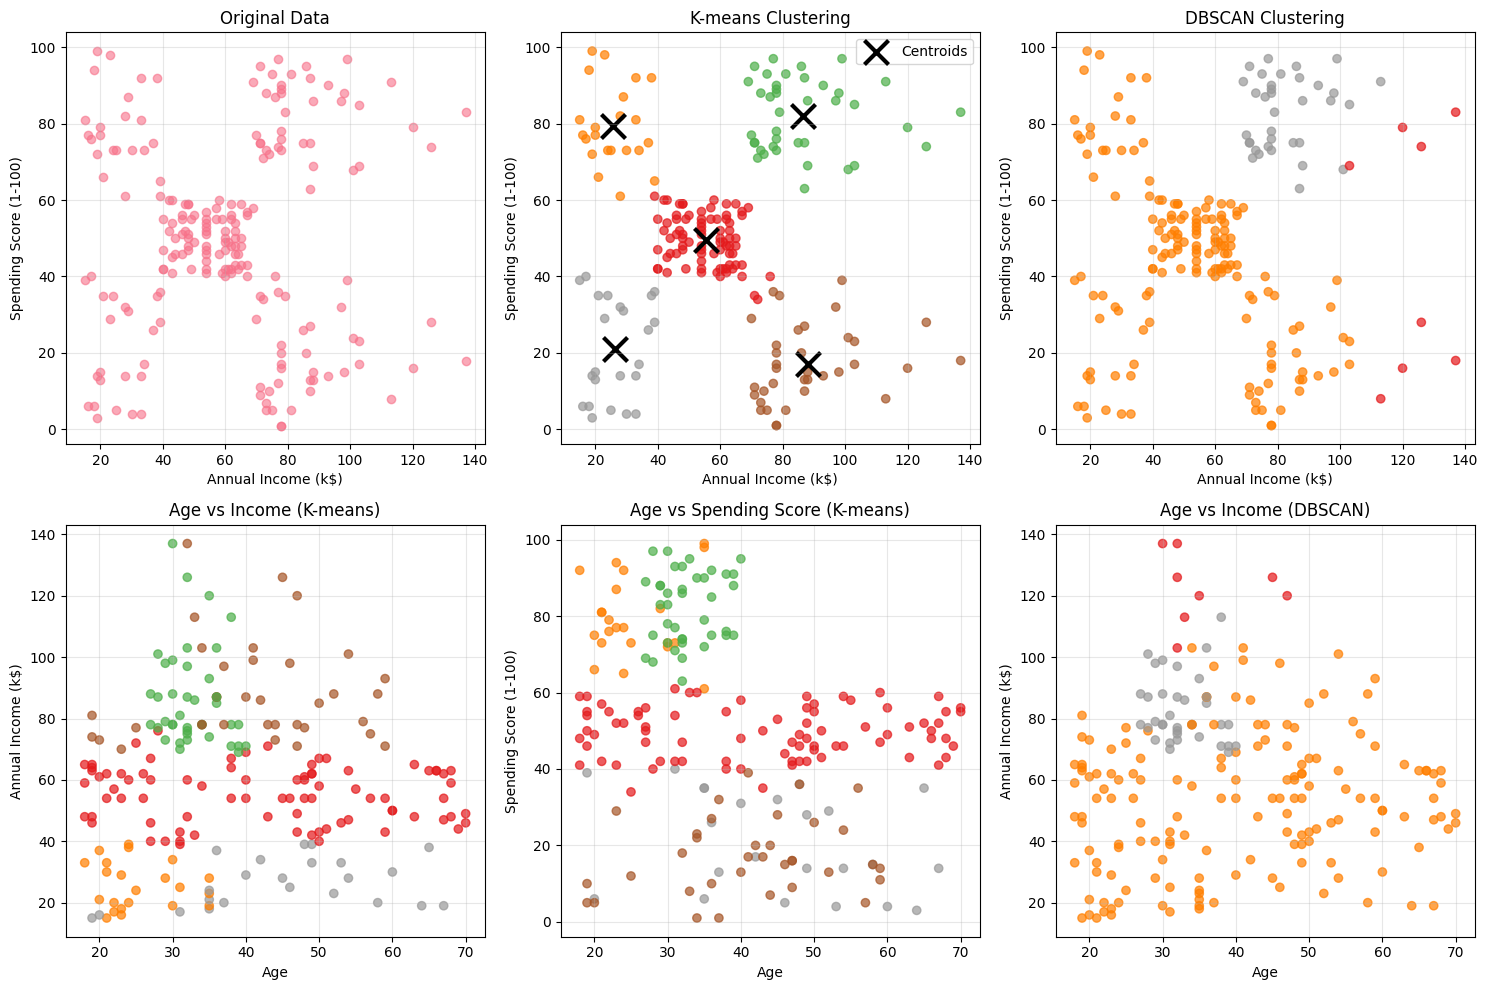

In [52]:
# Detailed analysis of clustering results
plt.figure(figsize=(15, 10))

# Plot 1: Original data
plt.subplot(2, 3, 1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6)
plt.title('Original Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

# Plot 2: K-means clustering
plt.subplot(2, 3, 2)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=kmeans_labels, cmap='Set1', alpha=0.7)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
           scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
           c='black', marker='x', s=300, linewidths=3, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: DBSCAN clustering
plt.subplot(2, 3, 3)
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=dbscan_labels, cmap='Set1', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

# Plot 4: Age vs Income colored by K-means clusters
plt.subplot(2, 3, 4)
plt.scatter(df['Age'], df['Annual Income (k$)'], c=kmeans_labels, cmap='Set1', alpha=0.7)
plt.title('Age vs Income (K-means)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True, alpha=0.3)

# Plot 5: Age vs Spending Score colored by K-means clusters
plt.subplot(2, 3, 5)
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=kmeans_labels, cmap='Set1', alpha=0.7)
plt.title('Age vs Spending Score (K-means)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

# Plot 6: Age vs Income colored by DBSCAN clusters
plt.subplot(2, 3, 6)
plt.scatter(df['Age'], df['Annual Income (k$)'], c=dbscan_labels, cmap='Set1', alpha=0.7)
plt.title('Age vs Income (DBSCAN)')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
# Cluster Analysis and Summary Statistics

print("="*50)
print("CLUSTER ANALYSIS SUMMARY")
print("="*50)

# K-means cluster analysis
print("\nK-MEANS CLUSTERING ANALYSIS:")
print("-" * 30)
for cluster in sorted(df_kmeans['KMeans_Cluster'].unique()):
    cluster_data = df_kmeans[df_kmeans['KMeans_Cluster'] == cluster]
    print(f"\nCluster {cluster} (n={len(cluster_data)}):")
    print(f"  Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"  Income: {cluster_data['Annual Income (k$)'].mean():.1f} ± {cluster_data['Annual Income (k$)'].std():.1f}")
    print(f"  Spending: {cluster_data['Spending Score (1-100)'].mean():.1f} ± {cluster_data['Spending Score (1-100)'].std():.1f}")
    print(f"  Gender: {cluster_data['Gender'].value_counts().to_dict()}")

# DBSCAN cluster analysis
print("\nDBSCAN CLUSTERING ANALYSIS:")
print("-" * 30)
for cluster in sorted(df_dbscan['DBSCAN_Cluster'].unique()):
    cluster_data = df_dbscan[df_dbscan['DBSCAN_Cluster'] == cluster]
    if cluster == -1:
        print(f"\nNoise Points (n={len(cluster_data)}):")
    else:
        print(f"\nCluster {cluster} (n={len(cluster_data)}):")
    print(f"  Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f}")
    print(f"  Income: {cluster_data['Annual Income (k$)'].mean():.1f} ± {cluster_data['Annual Income (k$)'].std():.1f}")
    print(f"  Spending: {cluster_data['Spending Score (1-100)'].mean():.1f} ± {cluster_data['Spending Score (1-100)'].std():.1f}")
    print(f"  Gender: {cluster_data['Gender'].value_counts().to_dict()}")

CLUSTER ANALYSIS SUMMARY

K-MEANS CLUSTERING ANALYSIS:
------------------------------

Cluster 0 (n=81):
  Age: 42.7 ± 16.4
  Income: 55.3 ± 9.0
  Spending: 49.5 ± 6.5
  Gender: {'Female': 48, 'Male': 33}

Cluster 1 (n=39):
  Age: 32.7 ± 3.7
  Income: 86.5 ± 16.3
  Spending: 82.1 ± 9.4
  Gender: {'Female': 21, 'Male': 18}

Cluster 2 (n=22):
  Age: 25.3 ± 5.3
  Income: 25.7 ± 7.6
  Spending: 79.4 ± 10.5
  Gender: {'Female': 13, 'Male': 9}

Cluster 3 (n=35):
  Age: 41.1 ± 11.3
  Income: 88.2 ± 16.4
  Spending: 17.1 ± 10.0
  Gender: {'Male': 19, 'Female': 16}

Cluster 4 (n=23):
  Age: 45.2 ± 13.2
  Income: 26.3 ± 7.9
  Spending: 20.9 ± 13.0
  Gender: {'Female': 14, 'Male': 9}

DBSCAN CLUSTERING ANALYSIS:
------------------------------

Noise Points (n=8):
  Age: 35.8 ± 6.5
  Income: 122.8 ± 11.5
  Spending: 46.9 ± 32.1
  Gender: {'Female': 4, 'Male': 4}

Cluster 0 (n=157):
  Age: 40.4 ± 15.2
  Income: 52.5 ± 21.8
  Spending: 43.1 ± 22.2
  Gender: {'Female': 89, 'Male': 68}

Cluster 1 (n=3

COMPARISON OF CLUSTERING METHODS

K-MEANS vs DBSCAN COMPARISON:
----------------------------------------
 Method  Clusters Found  Noise Points  Total Points Algorithmic Approach
K-Means               5             0           200       Centroid-based
 DBSCAN               2             8           200        Density-based

BUSINESS INSIGHTS FROM CUSTOMER SEGMENTATION

Based on the clustering analysis of Mall Customers:

K-MEANS INSIGHTS:
- Identified 5 distinct customer segments
- Clear separation based on income and spending patterns
- Useful for targeted marketing strategies

DBSCAN INSIGHTS:
- Identified density-based clusters
- Can handle noise and outliers effectively
- May identify fewer but more cohesive customer groups

RECOMMENDATIONS:
1. High Income, High Spending: Premium product targeting
2. High Income, Low Spending: Value proposition needed
3. Low Income, High Spending: Budget-friendly premium options
4. Low Income, Low Spending: Basic product offerings
5. Middle segments

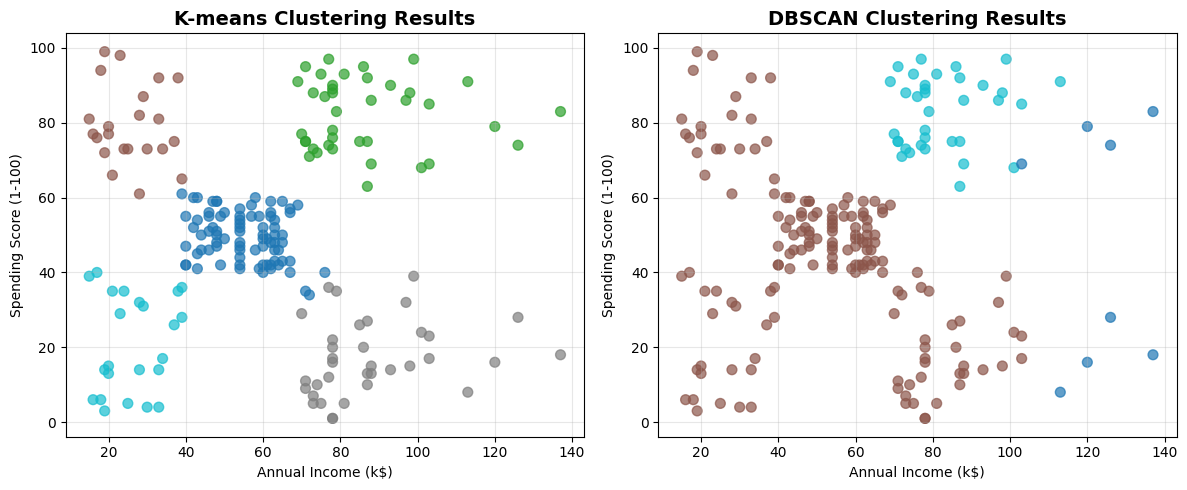

In [54]:
# Comparison and Conclusions
print("="*60)
print("COMPARISON OF CLUSTERING METHODS")
print("="*60)

print("\nK-MEANS vs DBSCAN COMPARISON:")
print("-" * 40)

# Create a summary table
comparison_data = {
    'Method': ['K-Means', 'DBSCAN'],
    'Clusters Found': [len(np.unique(kmeans_labels)), len(np.unique(dbscan_labels[dbscan_labels != -1]))],
    'Noise Points': [0, np.sum(dbscan_labels == -1)],
    'Total Points': [len(kmeans_labels), len(dbscan_labels)],
    'Algorithmic Approach': ['Centroid-based', 'Density-based']
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print("\n" + "="*60)
print("BUSINESS INSIGHTS FROM CUSTOMER SEGMENTATION")
print("="*60)

print("""
Based on the clustering analysis of Mall Customers:

K-MEANS INSIGHTS:
- Identified 5 distinct customer segments
- Clear separation based on income and spending patterns
- Useful for targeted marketing strategies

DBSCAN INSIGHTS:
- Identified density-based clusters
- Can handle noise and outliers effectively
- May identify fewer but more cohesive customer groups

RECOMMENDATIONS:
1. High Income, High Spending: Premium product targeting
2. High Income, Low Spending: Value proposition needed
3. Low Income, High Spending: Budget-friendly premium options
4. Low Income, Low Spending: Basic product offerings
5. Middle segments: Balanced marketing approach
""")

# Final visualization comparing both methods
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=kmeans_labels, cmap='tab10', alpha=0.7, s=50)
plt.title('K-means Clustering Results', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=dbscan_labels, cmap='tab10', alpha=0.7, s=50)
plt.title('DBSCAN Clustering Results', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()